## Data description

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Added new parameter to reading to strip spaces in string columns
data = pd.read_csv("data/adult.data", sep=',', names = ['age', 'workclass', 'fnlwgt', 'education', 'education_nnum', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hrsperwk', 'country', 'y'], skipinitialspace=True)
print(data)

       age         workclass  fnlwgt     education  education_nnum  \
0       39         State-gov   77516     Bachelors              13   
1       50  Self-emp-not-inc   83311     Bachelors              13   
2       38           Private  215646       HS-grad               9   
3       53           Private  234721          11th               7   
4       28           Private  338409     Bachelors              13   
5       37           Private  284582       Masters              14   
6       49           Private  160187           9th               5   
7       52  Self-emp-not-inc  209642       HS-grad               9   
8       31           Private   45781       Masters              14   
9       42           Private  159449     Bachelors              13   
10      37           Private  280464  Some-college              10   
11      30         State-gov  141297     Bachelors              13   
12      23           Private  122272     Bachelors              13   
13      32          

In [3]:
data = data.replace('?', np.nan)
data = data.dropna()
print(data.shape)

(30162, 15)


In [4]:
targets = data['y']

#### Creating age ranges (per 5 years)

In [5]:
print('min age: ',np.min(data['age'].values))
print('max age: ',np.max(data['age'].values))

data['age_range'] = pd.cut(data['age'], range(17, 93, 5))

min age:  17
max age:  90


#### Handle nominal variables

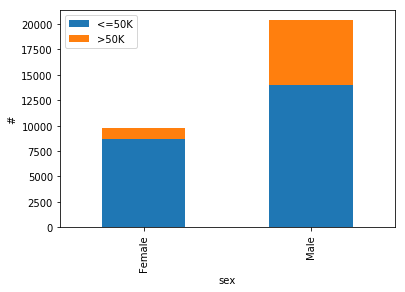

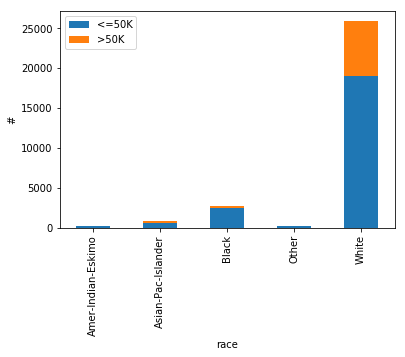

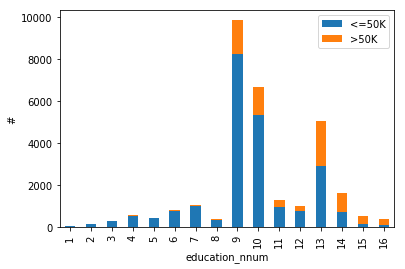

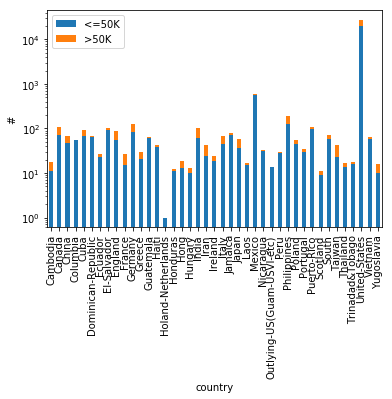

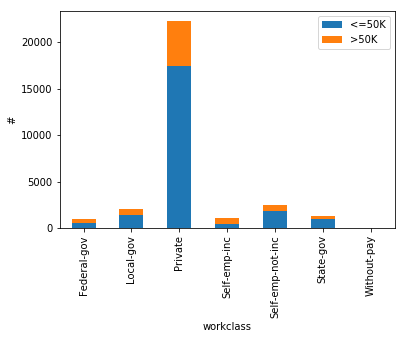

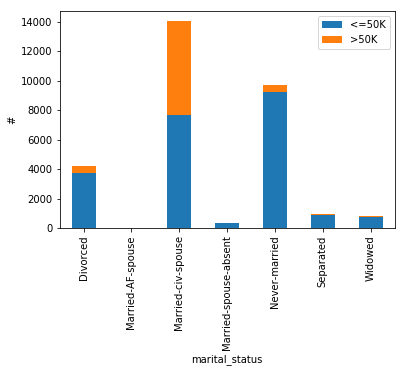

In [6]:
nominal_columns = ['sex', 'race', 'education_nnum', 'country', 'workclass', 'marital_status']
for nom_col in nominal_columns:
    # Pick up one nominal column and get its unique values
    df_colnames = data[nom_col].unique() # E.g. in case of country this is name of country
    df_idx = data['y'].unique()
    # Use nominal column unique values as column names and outputs as rows for new dataframe
    df = pd.DataFrame(index=df_idx, columns=df_colnames)
    for sc in df_colnames:
        # Pick those rows that contain given unique value, e.g. if handling countries this could be 'Netherlands'
        # Count number of values based on target column, i.e. y
        df2 = pd.value_counts(data[data[nom_col]==sc]['y'])
        # Add counts to empty dataframe
        df[sc] = df2

    # Sort columns based on their name
    df = df.reindex(sorted(df.columns), axis=1)
    # Switch columns and rows due to stacking in bar
    ax = df.T.plot.bar(stacked=True)
    # Set labels, # = read as 'number'
    ax.set(xlabel=nom_col, ylabel='#')
    # In case of country the U.S. has a lot of data points, so switch scale to logarithm to get others visible too
    if nom_col == 'country':
        ax.set_yscale('log')
    plt.show()


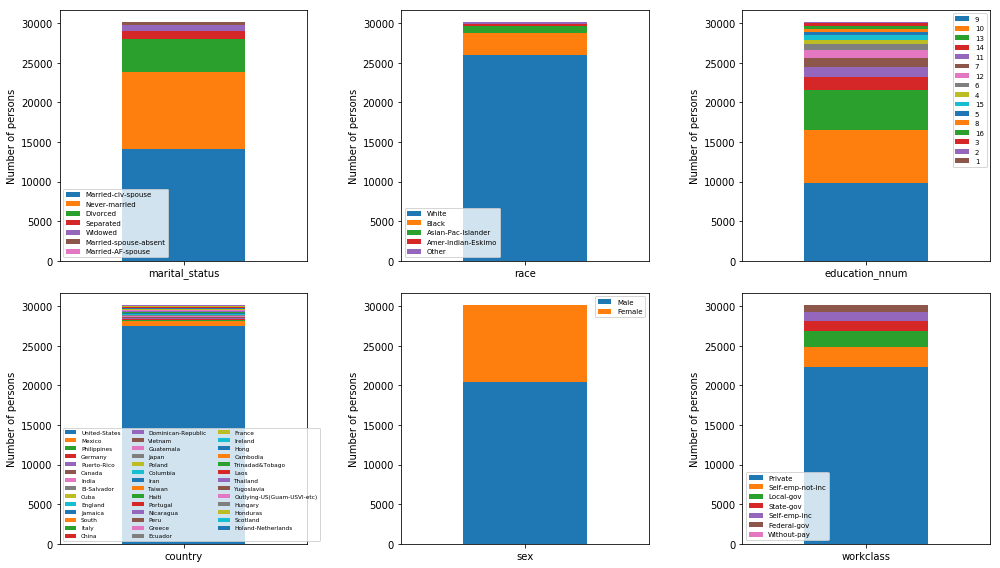

In [7]:
# Number of persons per nominal categories
dframes = {}
# Calculate category person counts
for sel_col in nominal_columns:
    df = pd.value_counts(data[sel_col]).to_frame()
    dframes[sel_col] = df

# Create single plot with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
idy = 0
idx = 0
for k,v in dframes.items():
    ax = v.T.plot(ax=axes[idy, idx], kind='bar', stacked=True, rot=0)
    # Set legend text size to very small when handling countries due to amount of them
    if k == 'country':
        ax.legend(fontsize='xx-small',ncol=3)
    else:
        ax.legend(fontsize='x-small')
    ax.set(ylabel='Number of persons')
    idx += 1
    if idx >= 3:
        idx = 0
        idy += 1

plt.tight_layout()
plt.show()


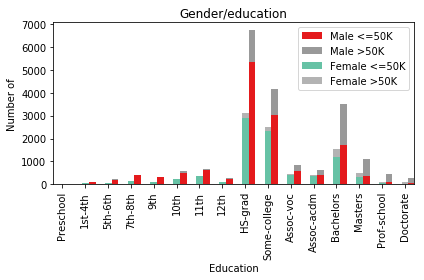

In [8]:
# Gender/education
edorder = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school',  'Doctorate' ]

fig, ax = plt.subplots()
# Count
dfp = data.groupby(['education_nnum', 'sex', 'y']).size()
# Plot male & female graphs
dfp[dfp.index.get_level_values('sex')=='Male'].unstack().plot(kind='bar', stacked=True, ax=ax, position=-0.5, width=0.3, colormap='Set1')
dfp[dfp.index.get_level_values('sex')=='Female'].unstack().plot(kind='bar', stacked=True, ax=ax, position=0.5, width=0.3, colormap='Set2')
# Set layout
ax.set(xlabel='Education', ylabel='Number of')
plt.xticks(np.arange(len(edorder)), edorder)
plt.legend(['Male <=50K','Male >50K','Female <=50K', 'Female >50K'])
plt.title('Gender/education')
plt.tight_layout()
plt.show()

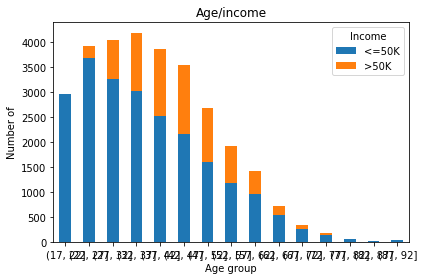

In [9]:
# Age group/income

# Count
dfp = data.groupby(['age_range', 'y']).size()
# Plot graph and set layout
ax = dfp.unstack().plot(kind='bar', stacked=True, rot=0)
ax.set(ylabel='Number of', xlabel='Age group')
plt.title('Age/income')
plt.legend(['<=50K','>50K'], title='Income')
plt.tight_layout()
plt.show()